In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot  as plt
import tensorflow as tf

In [9]:
df1=pd.read_csv('./penguins_cleaned (1).csv')
df=pd.DataFrame(df1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [10]:
y=df['sex']
y=y.replace({'male':1,'female':0})
y.head()

C:\Users\abdod\AppData\Local\Temp\ipykernel_5508\1737660875.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace({'male':1,'female':0})


0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [35]:
X=df.drop('sex', axis=1)
X.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181,3750
1,Adelie,Torgersen,39.5,17.4,186,3800
2,Adelie,Torgersen,40.3,18.0,195,3250
3,Adelie,Torgersen,36.7,19.3,193,3450
4,Adelie,Torgersen,39.3,20.6,190,3650


In [42]:
label_encoder_island = LabelEncoder()
label_encoder_species = LabelEncoder()
X['island'] = label_encoder_island.fit_transform(X['island'])

X['species'] = label_encoder_species.fit_transform(X['species'])

X.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
328,1,1,55.8,19.8,207,4000
329,1,1,43.5,18.1,202,3400
330,1,1,49.6,18.2,193,3775
331,1,1,50.8,19.0,210,4100
332,1,1,50.2,18.7,198,3775


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
y_test.head()

178    1
175    1
329    0
46     0
288    1
Name: sex, dtype: int64

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\abdod\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.86      0.88      0.87        34

    accuracy                           0.87        67
   macro avg       0.87      0.87      0.87        67
weighted avg       0.87      0.87      0.87        67



In [79]:
columns=X_train.head()
continuous_columns = [column for column in X_train if df[column].dtype in ['int64', 'float64']]

C:\Users\abdod\AppData\Local\Temp\ipykernel_5508\363972726.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Female', 'Male'])
C:\Users\abdod\AppData\Local\Temp\ipykernel_5508\363972726.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Female', 'Male'])
C:\Users\abdod\AppData\Local\Temp\ipykernel_5508\363972726.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Female', 'Male'])
C:\Users\abdod\AppData\Local\Temp\ipykernel_5508\363972726.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Female', 'Male'])


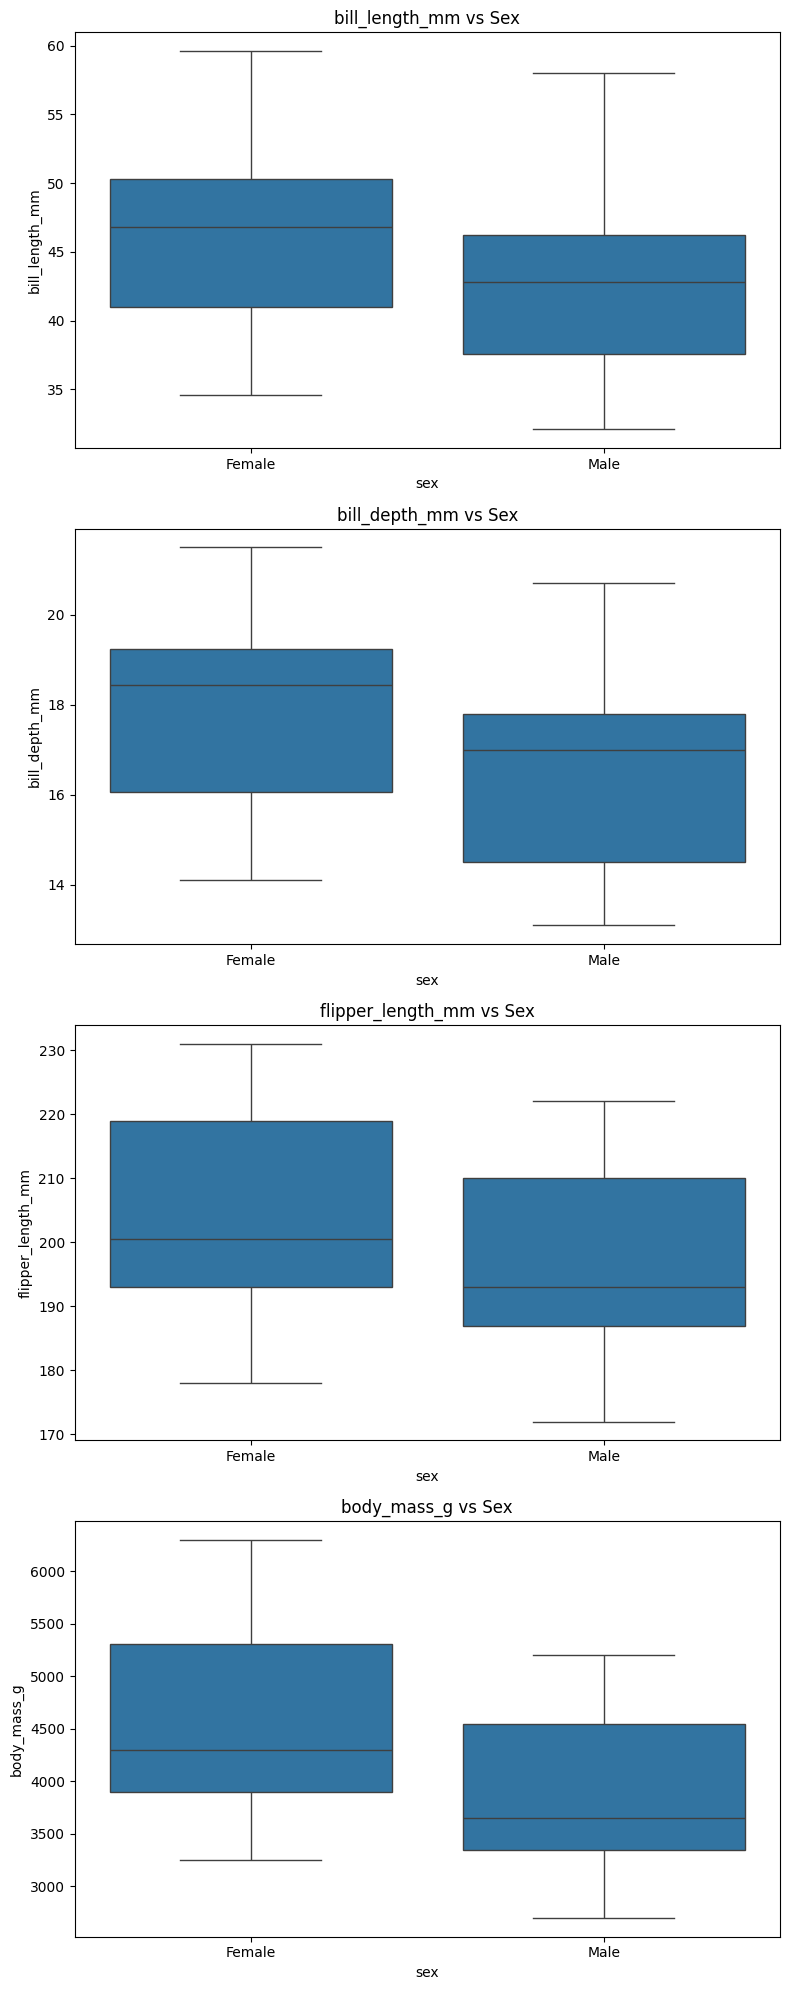

In [78]:
fig, axes = plt.subplots(len(continuous_columns), 1, figsize=(8, 5 * len(continuous_columns)))


for i, column in enumerate(continuous_columns):
    sns.boxplot(x='sex', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'{column} vs Sex')
    axes[i].set_xticklabels(['Female', 'Male'])

plt.tight_layout()
plt.show()

In [63]:
data = {
    'species':[2,1,0,1],
    'island':[0,0,1,2],
    'bill_length_mm': [39.1, 39.5, 40.3, 36.7],
    'bill_depth_mm': [18.7, 17.4, 18.0, 19.3],
    'flipper_length_mm': [181, 186, 195, 193],
    'body_mass_g': [3750, 3800, 3250, 3450],
}
data1 = {'sex': [0, 0, 0, 1]}  # Assuming 1 is male and 0 is female


test = pd.DataFrame(data)
ytest = pd.DataFrame(data1)


In [66]:
y_hat = model.predict(test)
print(y_hat,ytest)

[0 0 0 0]    sex
0    0
1    0
2    0
3    1


In [65]:
accuracy = accuracy_score(ytest, y_hat)  # Use ytest, not test
report = classification_report(ytest, y_hat)

# Step 3: Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\abdod\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdod\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdod\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i